# Using PCA for dimension reduction, and K Nearest Neighbors:
# Terry Snow 27/11/16

In [124]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
%pwd

'C:\\Users\\snowt\\ML\\BigData'

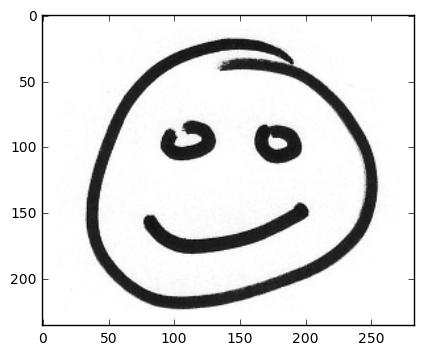

In [127]:
#path = "scan000S.jpeg"
path = "data/faces/scan001S.jpeg"
face = mpimg.imread(path,format='jpeg')
plt.imshow(face,cmap=plt.get_cmap("gray"))

In [128]:
#size of image matrix

In [129]:
image_shape=np.shape(face)
image_shape

(236, 283)

In [130]:
import glob

In [131]:
imfiles = glob.glob("data/faces/*.jpeg")

In [132]:
f=imfiles[0]
np.shape(imfiles)

(119,)

In [133]:
#I should have 4*6*5 = 120 files , 1 file is missing, it is the first face on Daniels page

In [134]:
print(f), f[18]

data/faces\Scan000S.jpeg


(None, 'S')

In [135]:
#Image has to be flattened for the PCA algo to work
imdata = np.zeros((119,236*283))
imdatatype = np.ravel(np.zeros(119,))

In [136]:
for i,f in enumerate(imfiles):
    im = mpimg.imread(f,'grey')
    imflat = im.flatten()/255.0
    typetest = 0 if f[18]=='S' else 1
    imtype = np.array(typetest)
    imdata[i] = imflat
    imdatatype[i] = imtype

In [137]:
np.shape(imdata)

(119, 66788)

In [138]:
np.shape(imdatatype)

(119,)

In [139]:
imdatatype = np.ravel(imdatatype)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(imdata,imdatatype, random_state=0)

In [141]:
#The data set has been split into a training set and test set

In [40]:
np.shape(X_train)

(89, 66788)

In [41]:
X_train[(0),(120,111)]

array([ 1.,  1.])

In [42]:
y_test

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.])

In [106]:
np.shape(y_test)

(30,)

In [144]:
#I have experimented with the number of Principal Components, 85 seems to be about the sweet spot
#more than 85 the accuracy starts reducing

In [43]:
from sklearn import decomposition
 
pca = decomposition.PCA(n_components=85,whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [101]:
np.shape(X_train),np.shape(X_test)

((89, 66788), (30, 66788))

In [47]:
print(format(pca.components_.shape))

(85, 66788)


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
#can determine the accuracy of the classifier againts the test set

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.77


In [143]:
#can visualize PCA components, looking at first 15 

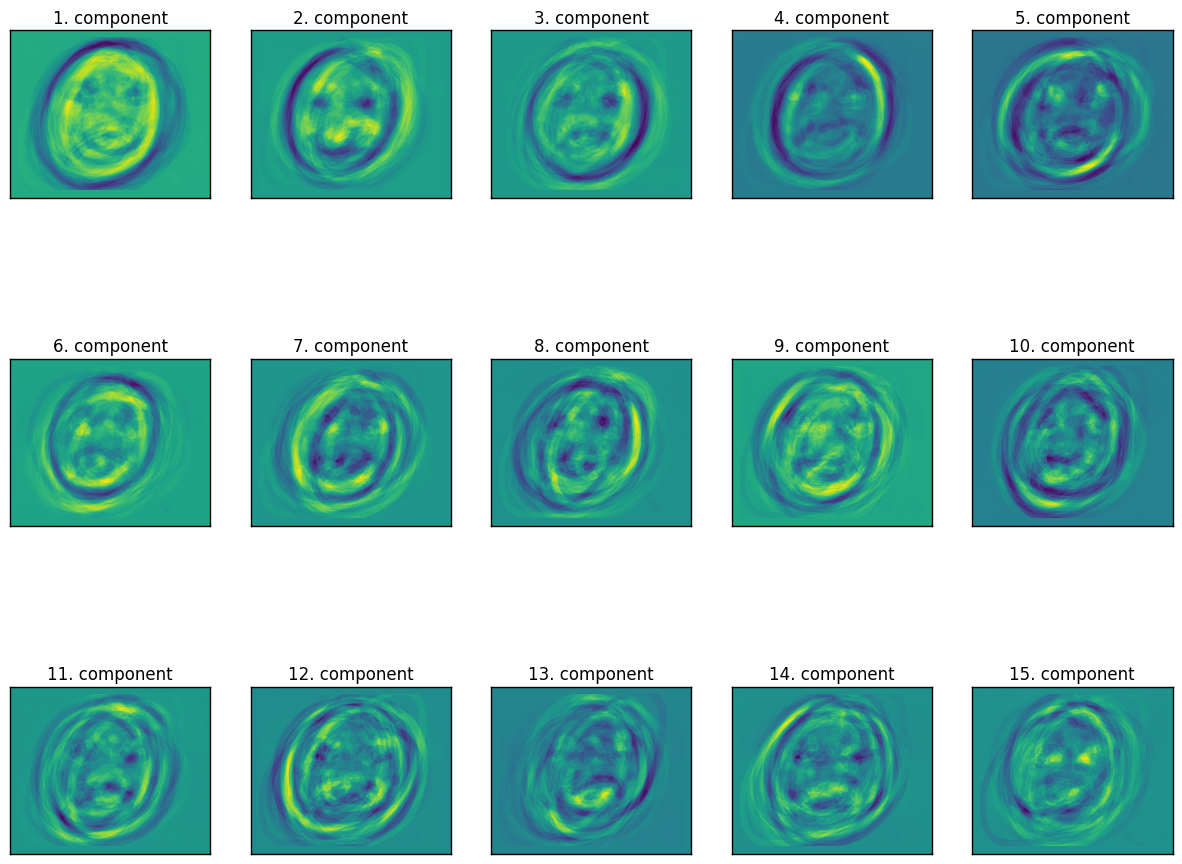

In [50]:
fix, axes = plt.subplots(3,5, figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i+1)))

In [102]:
#X_all_pca = pca.transform(imdata)
predict_test_ = knn.predict(X_test_pca)

In [103]:
predict_test_

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.])

In [104]:
y_test

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.])

## Displaying the test set (incorrect classifications are prefixed with X: )

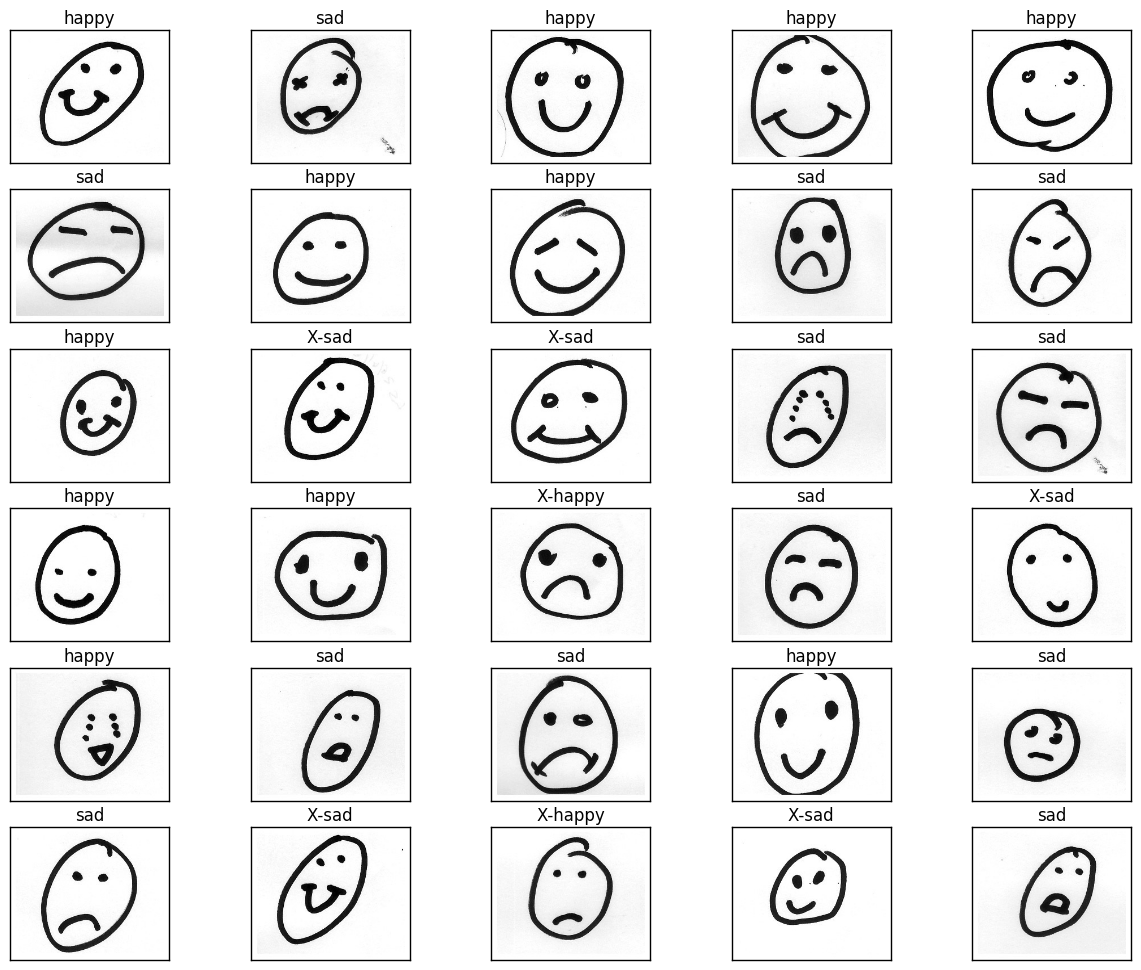

In [122]:
fix1, axes1 = plt.subplots(6,5, figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(X_test*255., axes1.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='gray')
    #ax.set_title("{}".format("happy" if predict_test_[i] == 0 else "sad"))    
    ax.set_title("{}{}".format("X-" if predict_test_[i] != y_test[i] else "",
                               "happy" if predict_test_[i] == 0 else "sad"))    

In [145]:
#find the nearest neighboors for the incorrectly classified faces

In [205]:
compare_index = 0
distance,nearest = knn.kneighbors(X_test_pca[compare_index].reshape(1,-1))
nearest,distance

(array([[54]], dtype=int64), array([[ 9.7022868]]))

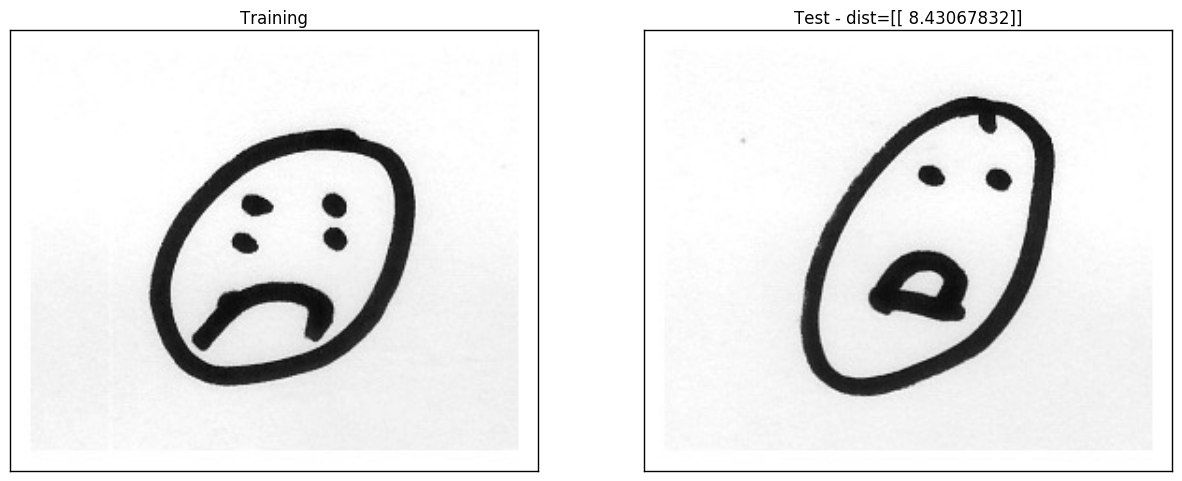

In [229]:
fix2, axes2 = plt.subplots(1,2, figsize=(15,19),subplot_kw={'xticks':(),'yticks':()})
axes2[0].imshow(X_train[nearest].reshape(image_shape)*255,cmap='gray')
axes2[0].set_title("Training")
axes2[1].imshow(X_test[compare_index].reshape(image_shape)*255,cmap='gray')
axes2[1].set_title("Test - dist={}".format(distance))

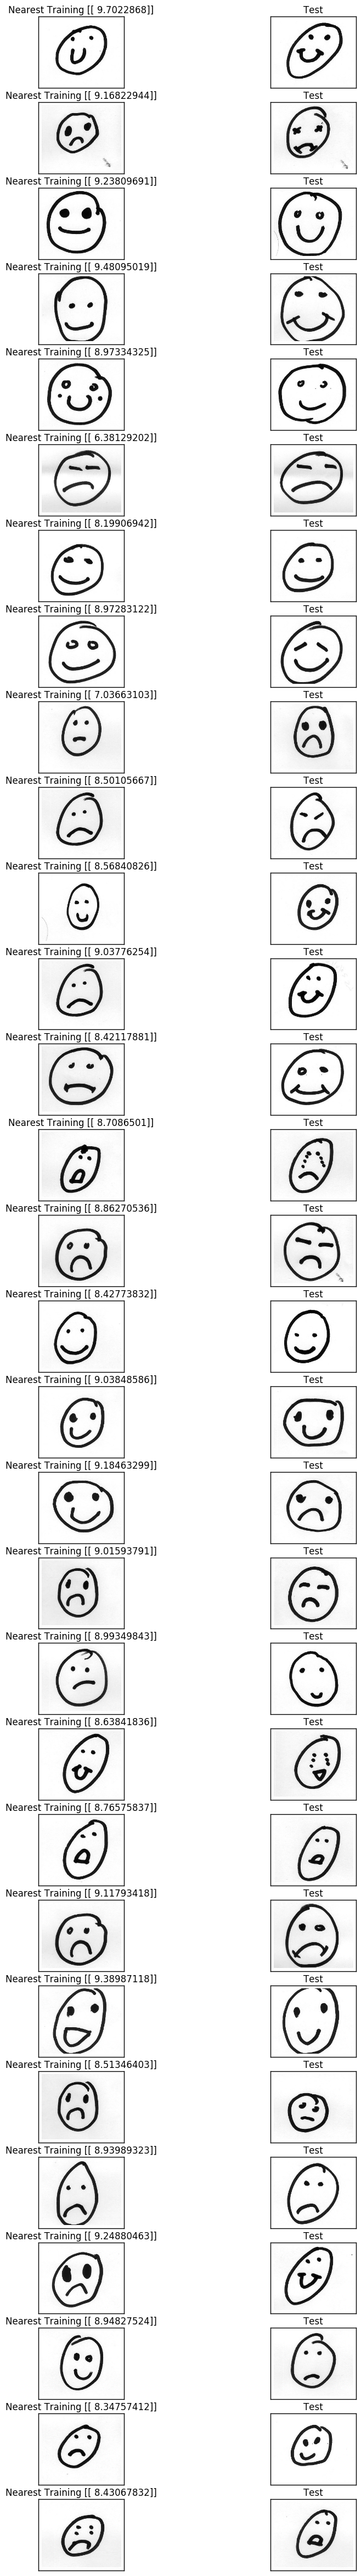

In [234]:
#finding the nearest neighboors for the whole test set
fix3, axes3 = plt.subplots(30,2,figsize=(10,60),subplot_kw={'xticks':(),'yticks':()})
for i, component in enumerate(X_test*255.):
    compare_index = i
    distance,nearest = knn.kneighbors(X_test_pca[i].reshape(1,-1))
    axes3[i,0].imshow(X_train[nearest].reshape(image_shape)*255,cmap='gray')
    axes3[i,0].set_title('Nearest Training {}'.format(distance))
    axes3[i,1].imshow(component.reshape(image_shape),cmap='gray')
    axes3[i,1].set_title("Test")